## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResults.csv',names=['DATE','TAG','POSTS'],header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
df.head()


,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2524, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

m             2524
TagName       2524
Unnamed: 2    2524
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [23]:
df.groupby('TAG').sum()



,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,43347
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,399693
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1603091
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,799745
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,51287
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,70975
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1907383
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2513065
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,67868


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [24]:
df.groupby('TAG').count()


,DATE,POSTS
TAG,,
assembly,182,182
c,182,182
c#,183,183
c++,182,182
delphi,182,182
go,167,167
java,182,182
javascript,182,182
perl,182,182


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [30]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [31]:
temp_df = df.pivot(index='DATE',columns='TAG',values='POSTS')
temp_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-05-01,174.0,1049.0,3835.0,1782.0,114.0,417.0,4183.0,7775.0,54.0,1971.0,11802.0,2866.0,255.0,998.0
2023-06-01,155.0,889.0,3815.0,1815.0,117.0,521.0,4295.0,7540.0,54.0,1906.0,11290.0,2667.0,226.0,1133.0
2023-07-01,163.0,919.0,3882.0,1858.0,99.0,526.0,4083.0,7559.0,69.0,1754.0,11191.0,2364.0,224.0,1158.0
2023-08-01,144.0,876.0,3682.0,1688.0,106.0,499.0,3870.0,6872.0,48.0,1807.0,10383.0,2364.0,204.0,988.0
2023-09-01,179.0,1033.0,3566.0,1988.0,116.0,513.0,4065.0,6722.0,70.0,2099.0,10306.0,2197.0,214.0,998.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [32]:
temp_df.shape

(183, 14)

In [33]:
temp_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [34]:
temp_df.count()

TAG
assembly      182
c             182
c#            183
c++           182
delphi        182
go            167
java          182
javascript    182
perl          182
php           182
python        182
r             180
ruby          182
swift         174
dtype: int64

In [35]:
temp_df.fillna(0,inplace=True)
temp_df.head()

In [56]:
temp_df.isna().values.any()

roll_df = temp_df.rolling(window=12).mean()


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

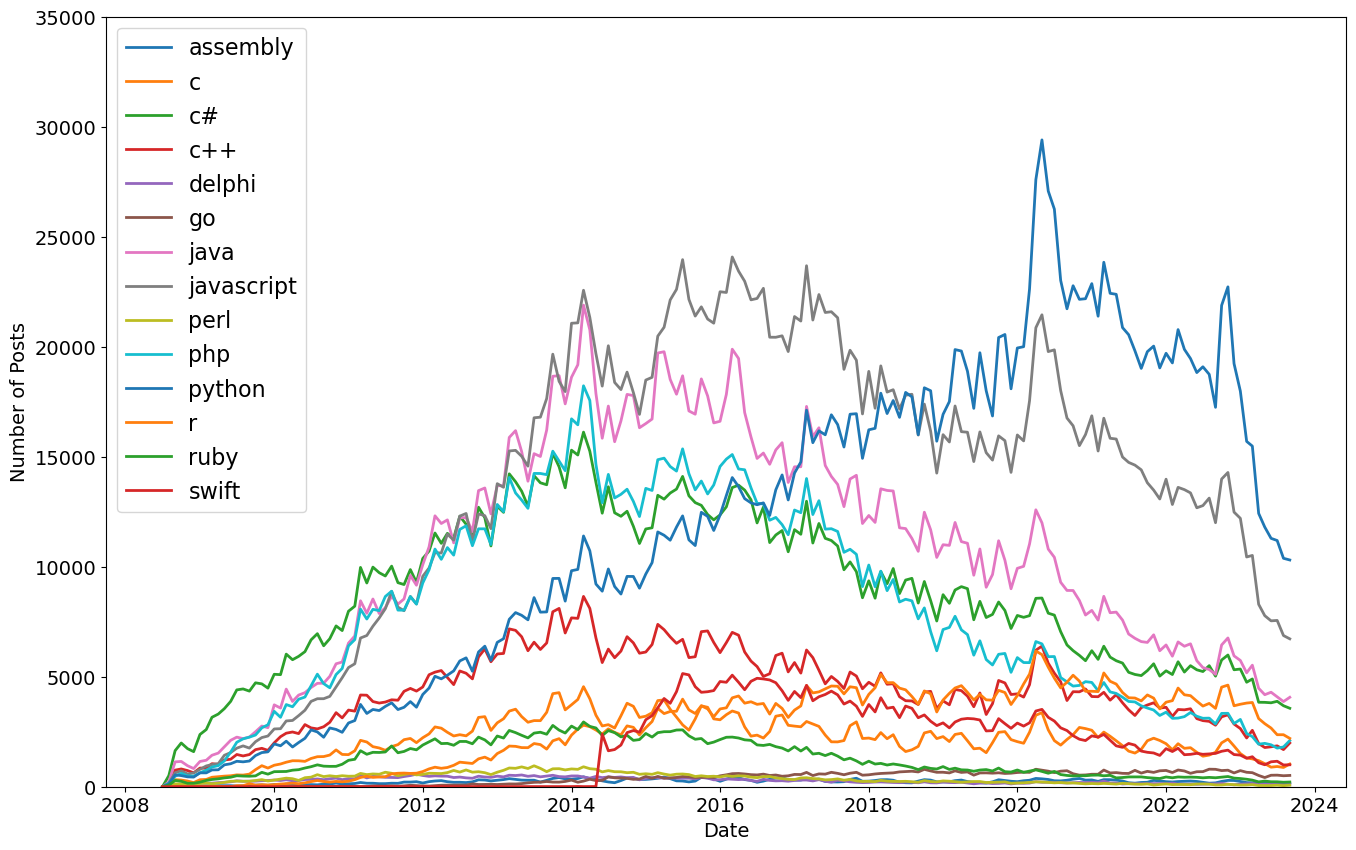

In [52]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in temp_df.columns:
    plt.plot(temp_df.index,temp_df[column],linewidth=2, label=temp_df[column].name)
plt.legend(fontsize=16) 




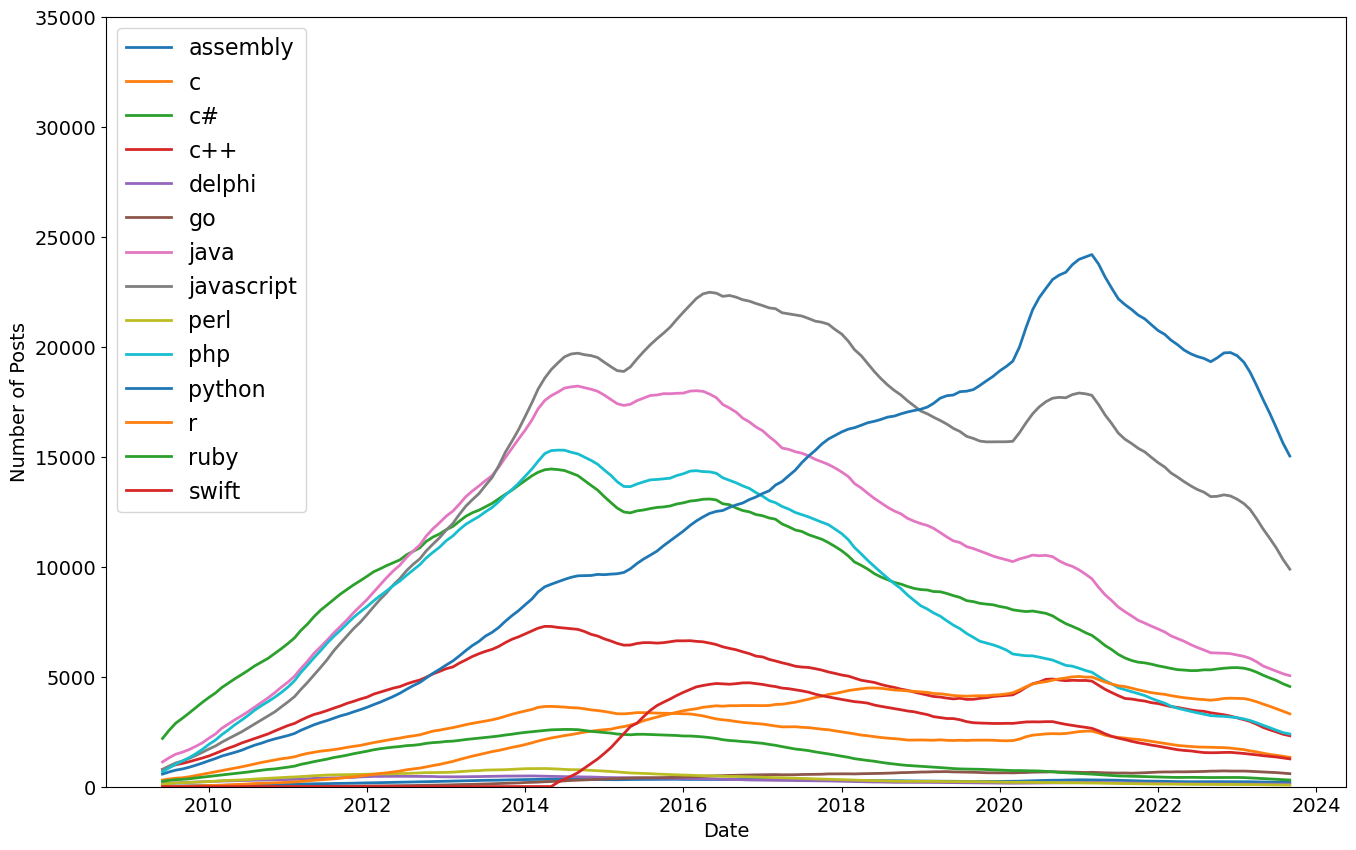

In [57]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=16) 



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 